# **Massachusetts Loan Default Risk & Local Economic Factors**

**Team Number : A01**

**Members of Team A01 :**
Kara Liao, Roberto Albornoz, Sai Leela Rahul Pujari, Juncheng (Leo) Zhu, Sarah Dsouza





## Table of Contents


---





1.    [Introduction & Motivation (Project Proposal)](#scrollTo=Ja34v4RMPeRw&line=1uniqifier=1)
2.    [ Data Source & Description](#scrollTo=cZ_6R-cxIBpF&line=4&uniqifier=1)
3. [Executive Summary & Previous Work](#scrollTo=rEHKd0X3G3b3&line=2&uniqifier=1)
4.  [Data Manipulation & Cleaning](#scrollTo=0RIAGIuA-Quv)

    4.1.  [Loan dataset cleaning](#scrollTo=iQod5P1g-mfO)

    4.2.  [ACS dataset cleaning](#scrollTo=y8eYyeEPkzkx)

    4.3.  [Merging two datasets](#scrollTo=TiVjQdcAkeyf&line=1&uniqifier=1)

    4.4.  [Columns Justification and Action](#scrollTo=PZqUZ48dIrbf&line=1&uniqifier=1)
5. [  Exploratory Data Analysis ](#scrollTo=_x3L6vkrKMBA)
6.  [ Conclusion](#scrollTo=Ql74adaR6nJ8&line=1&uniqifier=1)
7. [Future Steps & Challenges](#scrollTo=ywDHViMY69Ix&line=1&uniqifier=1)
8.  [ References](#scrollTo=Qq9zFxV57J3U&line=2&uniqifier=1)
9.  [ Generative AI Disclosure](#scrollTo=H2BkRPrG7hCT&line=1&uniqifier=1)


---








# 1. Introduction & Motivation (Project Proposal)

**Problem Statement:**
Financial institutions usually face challenges in assessing loan applications for individuals with insufficient or non-existent credit history. Financial institutions need to uncover drivers of loan default to better understand default risk which will help them to issue loans more efficiently and minimize default risk. We combine borrower-level features with community-level indicators to explain and forecast default risk at MA’s micro-market level, enabling better pricing, term, and exposure decisions.

**Motivation :**
We want to connect borrower outcomes with Massachusetts economic conditions. This will show how local context shapes loan performance and provide insights lenders could use to better manage risk while still expanding access to credit.

**Proposal:**
We will analyze LendingClub’s 2019 loan data to find patterns in credit performance - loan repayment and default. After cleaning and preparing the data, we’ll start with national trends, then compare Massachusetts to the U.S. overall, and finally focus on detailed Massachusetts visualizations to see how local factors affect loan outcomes.

---

# 2. Data Source & Description

- **Primary:** LendingClub Loan Data (2019) (≥10K rows, ~385MB)  [Link](https://www.kaggle.com/datasets/beatafaron/loan-credit-risk-and-population-stability?select=loan_2019_20.csv)
- **Secondary:** U.S. Census Bureau American Community Survey (ACS) 2019 5-Year Estimates for Massachusetts socioeconomic indicators (e.g., median household income, poverty rate). [Link](https://data.census.gov/table/ACSST1Y2019.S1903?q=Median+Household+Income+ZCTA&g=040XX00US25&y=2019)




Massachusetts Loan Data:

| index | Variables         | Definition                                   |
 :------| :---------------| :------                                     |
 0  | id               | A unique ID assigned for the loan listing
 1  | zip_code         | The first 3 numbers of the zip code provided by the borrower
 2  | addr_state       | The state provided by the borrower
 3  | loan_amnt        | The listed amount of the loan applied for by the borrower
 4  | loan_status      | Current status of the loan
 5  | term             | The number of payments on the loan. Values are in months and can be either 36 or 60
 6  | int_rate         | Interest Rate on the loan
 7  | installment      | The monthly payment owed by the borrower if the loan originates
 8  | grade            | Assigned loan grade
 9  | sub_grade        | Assigned loan subgrade
10  | emp_title        | The job title supplied by the Borrower
11  | emp_length       | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more
12  | home_ownership   | The home ownership status provided by the borrower during registration or obtained from the credit report. Values: Rent, Own, Mortgage, Any
13  | annual_inc       | The self-reported annual income
14  | verification_status | Indicates if income was verified by LC
15  | purpose          | A category provided by the borrower for the loan request
16  | dti              | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income
17  | fico_range_low   | The lower boundary range the borrowers FICO at loan origination belongs to
18  | fico_range_high  | The upper boundary range the borrowers FICO at loan origination belongs to
19  | inq_last_6mths   | Number of credit inquiries in past 12 months
20  | open_acc         | The number of open credit lines in the borrower’s credit file
21  | pub_rec          | Number of derogatory public records
22  | revol_bal        | Total credit revolving balance
23  | revol_util       | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit
24  | total_acc        | The total number of credit lines currently in the borrowers credit file
25  | delinq_2yrs      | The number of 30+ days past-due incidences of delinquency in the borrowers credit file for the past 2 years



Dataset: United States Census Data for Massachusetts socioeconomic indicators (ACS)</br>



| index | Variables         | Definition                                   |
 :------| :---------------  | :-----------                                    |
  0     | Geographic Area Name              | Geographic Area Name |
  1     | Total Household        | Total number of households|
  2     | Age of Householder      |Household count by age band: 15–24, 25–44, 45–64, 65+ (labeled “over 65”).|
  3     |   Family Size (4+)    |Household count by family size: 4-person, 5-person, 6-person, 7+ persons.|
  4     |  Earners per Household — Count     |Household count by number of earners: 0, 1, 2, 3+.|
  5     |  Earners per Household — Percent   |Percent distribution by number of earners: 0, 2, 3+ (share of households).|
  6    |   Percent Age 65+   |Percent of households with householder age 65+.|
  7     | Median Household Income      |Median income of total households (USD).|
  



  ---


# 3. Executive Summary & Previous Work

### Executive Summary

Objectives:
* Build a Massachusetts loan-level risk view by combining LendingClub 2019 borrower features with local ACS socioeconomic indicators at the ZIP3 level.
* Quantify how credit quality (FICO, grade) and capacity-to-repay (DTI, term) drive default probability and pricing.
* Test whether community-level conditions (income, age structure) add incremental signal to borrower-level risk.

Key Findings:
* Default risk declines monotonically with higher FICO and better grades, and 60-month terms consistently carry higher PD than 36-month terms.
* Interest rates are inversely related to FICO and grade, indicating broadly consistent risk-based pricing.
* Employment length shows weak association with income, while lower local median household income areas exhibit higher delinquency rates.

Methods:
* Data Preparation:
Cleaned and standardized LendingClub data. Derived key metrics such as Debt-to-Income (DTI), Revolving Balance, and Employment Length.
* Exploratory Data Analysis (EDA):
Conducted national-level and Massachusetts-specific EDA through visualizations (violin, heatmap, bar, and correlation plots) to identify relationships between borrower risk factors (FICO, grade, term, purpose) and loan outcomes.
* Integration & Mapping:
Joined borrower data with ZIP3-level ACS indicators (income, age, and population metrics) to visualize spatial variation in loan delinquency and median income across Massachusetts.

Recommendations:
* Anchor underwriting on FICO and grade, and add term-based PD uplifts to reflect longer exposure.
* Incorporate a simple geographic overlay (ZIP3 median income) as a tie-breaker for borderline files and for portfolio concentration limits.
* Favor smaller amounts and/or shorter terms for riskier grades, and monitor high-DTI pockets within low-income ZIP3s for early-warning signals.

### Previous Work (Team Assignment Summary)
 The results from our team assignment suggest that risk-return outcomes in Massachusetts are driven primarily by FICO, loan grade, and repayment capacity. We also uncovered that interest rates track those default risk signals in a monotone fashion; this project extends that work by layering in local economic context and testing whether place-based factors refine Massachusetts default risk segmentation.



# 4. Data Cleaning

## 4.1 Cleaning LendingClub's Loan Dataset

### Step 0. Setup and Inspect


Mounting file from drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
import missingno as msno
import seaborn as sns
from geopy.geocoders import Nominatim
import folium
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [7]:
loan = pd.read_csv("/content/drive/MyDrive/Fall2025/Intro_to_Data_Analytics/Project/LoansDatasetLendingClub2019.csv")
loan.head()

/tmp/ipython-input-2054697956.py:1: DtypeWarning: Columns (137) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv("/content/drive/MyDrive/Fall2025/Intro_to_Data_Analytics/Project/LoansDatasetLendingClub2019.csv")


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,149203043,24000,24000,24000.0,60 months,13.90%,557.20,C,C1,...,Apr-20,Jun-20,Apr-20,2.0,0.0,ACTIVE,473.24,20656.42,557.2,N
1,1,149354242,18500,18500,18500.0,60 months,14.74%,437.60,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,149355875,24000,24000,24000.0,36 months,8.19%,754.18,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,149437986,2800,2800,2775.0,36 months,8.19%,87.99,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,149511512,8800,8800,8800.0,36 months,20.00%,327.04,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


### Step 1. Column Subset

In [8]:
clean_loan = loan[["id","zip_code","addr_state","loan_amnt","loan_status","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","purpose","dti","fico_range_low","fico_range_high","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","delinq_2yrs"]].copy()

In [9]:
clean_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664824 entries, 0 to 664823
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   664824 non-null  int64  
 1   zip_code             664824 non-null  object 
 2   addr_state           664824 non-null  object 
 3   loan_amnt            664824 non-null  int64  
 4   loan_status          664824 non-null  object 
 5   term                 664824 non-null  object 
 6   int_rate             664824 non-null  object 
 7   installment          664824 non-null  float64
 8   grade                664824 non-null  object 
 9   sub_grade            664824 non-null  object 
 10  emp_title            567707 non-null  object 
 11  emp_length           606511 non-null  object 
 12  home_ownership       664824 non-null  object 
 13  annual_inc           664824 non-null  float64
 14  verification_status  664824 non-null  object 
 15  purpose          

### Step 2. Binary Verification Flag

In [10]:
verify_status_map = {"Not Verified": 0, "Verified": 1,"Source Verified": 1}

clean_loan["verification_status_binary"] = clean_loan["verification_status"].map(verify_status_map).astype("Int64")

loan["verification_status"].isna().sum() #checking null values

np.int64(0)

### Step 3. Missingness Scan - Counted missing values

In [11]:
clean_loan.isna().sum()

,0
id,0
zip_code,0
addr_state,0
loan_amnt,0
loan_status,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0


### Step 4. Normalize Employment Length

In [12]:
clean_loan["emp_length"] = clean_loan["emp_length"].str.replace(" years","")
clean_loan["emp_length"] = clean_loan["emp_length"].str.replace(" year","")
clean_loan["emp_length"] = clean_loan["emp_length"].str.replace("10+","10")
clean_loan["emp_length"] = clean_loan["emp_length"].str.replace("< 1","0")
clean_loan["emp_length"] = clean_loan["emp_length"].fillna("0")
clean_loan["emp_length"] = clean_loan["emp_length"].astype('int')

### Step 5. Normalize Term

In [13]:
clean_loan["term"] = clean_loan["term"].str.replace(" months","").astype("int")

### Step 6. Convert Percent Fields

In [14]:
clean_loan["int_rate"] = clean_loan["int_rate"].str.replace("%","").astype("float") # replacing % with empty space and converting values to float
clean_loan["int_rate"] /= 100 # dividing by 100 for percentage calculation
clean_loan['revol_util'] = clean_loan['revol_util'].str.replace("%","").astype("float")
clean_loan['revol_util (%)'] = clean_loan['revol_util']

### Step 7. Duplicate ID Check

In [15]:
clean_loan["id"].shape #664824

(664824,)

In [16]:
clean_loan["id"] = clean_loan["id"].drop_duplicates()

In [17]:
clean_loan["id"].nunique()

664824

### Step 8. Grade & Category Hygiene
Displayed grade distribution. Replaced underscores in `purpose` values with spaces for readability.


In [18]:
clean_loan['grade'].value_counts()

,count
grade,
A,223275
B,194016
C,152227
D,91856
E,3397
F,36
G,17


Drop grades F and G as they are comparatively smaller in number

In [19]:
indice_to_drop = clean_loan[clean_loan['grade'].isin(['F','G'])].index
clean_loan.drop(indice_to_drop,inplace=True)

Checking purpose column
debt_consolidation - additional loan to repay current loan

In [20]:
clean_loan['purpose'] = clean_loan['purpose'].str.replace('_',' ')

### Step 9. Employment Title Imputation

In [21]:
clean_loan['emp_title'] = clean_loan['emp_title'].fillna("Not Given")
clean_loan['emp_title'].isna().sum()

np.int64(0)

### Step 10. Filling missing values

In [22]:
#Based on missingno plot there are some missing values in dti and revol_util
clean_loan["dti"] = clean_loan["dti"].fillna(0)
clean_loan["revol_util"] = clean_loan["revol_util"].fillna(0)

### Step 11. Loan Status Encoding
Mapped multi-class `loan_status` into binary (`loan_status_binary`: 1 = default/charged-off, 0 = others).


In [23]:
status_map = {"Charged Off": 1, "Default": 1, "Late (31-120 days)": 0,"Late (16-30 days)": 0,"In Grace Period": 0,"Current": 0, "Fully Paid": 0,"Issued": 0}

clean_loan["loan_status_binary"] = clean_loan["loan_status"].map(status_map).astype("Int64")

clean_loan["loan_status_binary"].value_counts()

,count
loan_status_binary,
0,651154
1,13617


### Step 12. State Filter (Massachusetts)
Subset dataset to Massachusetts borrowers (`MA_clean_loan`).

In [24]:
MA_clean_loan = clean_loan[clean_loan['addr_state'] == 'MA']
MA_clean_loan

,id,zip_code,addr_state,loan_amnt,loan_status,term,int_rate,installment,grade,sub_grade,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,delinq_2yrs,verification_status_binary,revol_util (%),loan_status_binary
44,149522875,025xx,MA,25000,Current,36,0.1390,853.23,C,C1,...,0,10,0,16237,28.7,17,1,0,28.7,0
84,149512653,024xx,MA,20000,Fully Paid,36,0.1308,674.65,B,B5,...,0,10,0,26762,50.1,13,0,0,50.1,0
104,149223304,021xx,MA,10000,Current,36,0.2000,371.64,D,D2,...,0,10,0,14166,77.4,12,1,1,77.4,0
277,149508142,023xx,MA,21000,Current,60,0.1033,449.61,B,B1,...,0,17,0,30639,55.0,25,0,0,55.0,0
343,149493588,017xx,MA,15000,Current,36,0.1102,491.23,B,B2,...,0,7,0,24277,61.9,16,0,1,61.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664753,169194425,016xx,MA,15000,Current,36,0.1730,537.04,C,C1,...,0,10,0,7310,56.2,18,0,1,56.2,0
664778,169197367,021xx,MA,20000,Current,60,0.1730,500.29,C,C1,...,0,4,0,3484,99.5,15,1,0,99.5,0
664781,169177234,021xx,MA,15000,Current,60,0.1730,375.22,C,C1,...,0,12,0,8735,42.4,20,0,0,42.4,0
664810,169216487,010xx,MA,35000,Current,36,0.0846,1104.22,A,A1,...,0,9,0,33465,75.0,30,0,0,75.0,0


## 4.2 Data Cleaning of ACS socioeconomic dataset

### Step 0. Setup and Info

In [25]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ACSST5Y2019.S1903_2025-09-21T212729/Data.csv')
df

/tmp/ipython-input-3981886604.py:2: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,110,111,148,149) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/ACSST5Y2019.S1903_2025-09-21T212729/Data.csv')


,GEO_ID,NAME,S1903_C01_001E,S1903_C01_001M,S1903_C01_002E,S1903_C01_002M,S1903_C01_003E,S1903_C01_003M,S1903_C01_004E,S1903_C01_004M,...,S1903_C03_036E,S1903_C03_036M,S1903_C03_037E,S1903_C03_037M,S1903_C03_038E,S1903_C03_038M,S1903_C03_039E,S1903_C03_039M,S1903_C03_040E,S1903_C03_040M
0,Geography,Geographic Area Name,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...
1,0400000US25,Massachusetts,2617497,4909,2149509,5041,173234,2124,5193,467,...,32060,364,92046,1720,54546,559,43673,612,100772,1971
2,8600000US00601,ZCTA5 00601,5509,189,4180,264,27,25,6,11,...,7311,1870,-,**,12361,5183,10590,5059,17014,4100
3,8600000US00602,ZCTA5 00602,12740,443,10888,462,341,113,12,21,...,8608,968,29934,11767,11343,2243,10216,1959,15000,12265
4,8600000US00603,ZCTA5 00603,19228,503,15439,541,758,165,42,36,...,8885,745,37006,21750,12209,1846,11647,1939,14821,14329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33117,8600000US99923,ZCTA5 99923,14,20,14,20,0,9,0,9,...,-,**,-,**,-,**,-,**,-,**
33118,8600000US99925,ZCTA5 99925,317,41,179,31,3,5,104,25,...,24583,9253,-,**,21518,1864,21607,1627,-,**
33119,8600000US99926,ZCTA5 99926,487,41,71,25,0,9,382,38,...,24167,15499,-,**,31406,9499,23214,12882,-,**
33120,8600000US99927,ZCTA5 99927,0,9,0,9,0,9,0,9,...,-,**,-,**,-,**,-,**,-,**


### Step 1. Load and Fix Headers
Raw CSV has metadata row as data, misaligned headers. So we need the dataset now structured with correct headers.


In [26]:
df.columns =df.iloc[0]
df =df[1:]
df=df.reset_index(drop=True)
df

,Geography,Geographic Area Name,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households,Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!White,Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!White,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Black or African American,Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Black or African American,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!American Indian and Alaska Native,Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!American Indian and Alaska Native,...,Estimate!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Female householder!!Living alone,Margin of Error!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Female householder!!Living alone,Estimate!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Female householder!!Not living alone,Margin of Error!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Female householder!!Not living alone,Estimate!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder,Margin of Error!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder,Estimate!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder!!Living alone,Margin of Error!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder!!Living alone,Estimate!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder!!Not living alone,Margin of Error!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder!!Not living alone
0,0400000US25,Massachusetts,2617497,4909,2149509,5041,173234,2124,5193,467,...,32060,364,92046,1720,54546,559,43673,612,100772,1971
1,8600000US00601,ZCTA5 00601,5509,189,4180,264,27,25,6,11,...,7311,1870,-,**,12361,5183,10590,5059,17014,4100
2,8600000US00602,ZCTA5 00602,12740,443,10888,462,341,113,12,21,...,8608,968,29934,11767,11343,2243,10216,1959,15000,12265
3,8600000US00603,ZCTA5 00603,19228,503,15439,541,758,165,42,36,...,8885,745,37006,21750,12209,1846,11647,1939,14821,14329
4,8600000US00606,ZCTA5 00606,1946,176,938,174,6,9,10,16,...,8125,5769,13393,2693,11197,3128,11691,4841,9934,6691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,8600000US99923,ZCTA5 99923,14,20,14,20,0,9,0,9,...,-,**,-,**,-,**,-,**,-,**
33117,8600000US99925,ZCTA5 99925,317,41,179,31,3,5,104,25,...,24583,9253,-,**,21518,1864,21607,1627,-,**
33118,8600000US99926,ZCTA5 99926,487,41,71,25,0,9,382,38,...,24167,15499,-,**,31406,9499,23214,12882,-,**
33119,8600000US99927,ZCTA5 99927,0,9,0,9,0,9,0,9,...,-,**,-,**,-,**,-,**,-,**


### Step 2: Clean Geographic Area Names

Get the Zip data ready for use for analysis and joining

In [27]:
# Making a flag for valid US addresses
df['is_zcta'] = df['Geography'].str.startswith('8600000US')

# df['is_zcta'].value_counts()
df["Geographic Area Name"] = df["Geographic Area Name"].astype("string")

zip5 = df["Geographic Area Name"].str.extract(r'\bZCTA5\s*(\d{5})\b', expand=False)

df["ZCTA5"] = zip5
df["zip3"] = zip5.str[:3].astype("string")
df

,Geography,Geographic Area Name,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households,Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!White,Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!White,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Black or African American,Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Black or African American,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!American Indian and Alaska Native,Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!American Indian and Alaska Native,...,Margin of Error!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Female householder!!Not living alone,Estimate!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder,Margin of Error!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder,Estimate!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder!!Living alone,Margin of Error!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder!!Living alone,Estimate!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder!!Not living alone,Margin of Error!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder!!Not living alone,is_zcta,ZCTA5,zip3
0,0400000US25,Massachusetts,2617497,4909,2149509,5041,173234,2124,5193,467,...,1720,54546,559,43673,612,100772,1971,False,<NA>,<NA>
1,8600000US00601,ZCTA5 00601,5509,189,4180,264,27,25,6,11,...,**,12361,5183,10590,5059,17014,4100,True,00601,006
2,8600000US00602,ZCTA5 00602,12740,443,10888,462,341,113,12,21,...,11767,11343,2243,10216,1959,15000,12265,True,00602,006
3,8600000US00603,ZCTA5 00603,19228,503,15439,541,758,165,42,36,...,21750,12209,1846,11647,1939,14821,14329,True,00603,006
4,8600000US00606,ZCTA5 00606,1946,176,938,174,6,9,10,16,...,2693,11197,3128,11691,4841,9934,6691,True,00606,006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,8600000US99923,ZCTA5 99923,14,20,14,20,0,9,0,9,...,**,-,**,-,**,-,**,True,99923,999
33117,8600000US99925,ZCTA5 99925,317,41,179,31,3,5,104,25,...,**,21518,1864,21607,1627,-,**,True,99925,999
33118,8600000US99926,ZCTA5 99926,487,41,71,25,0,9,382,38,...,**,31406,9499,23214,12882,-,**,True,99926,999
33119,8600000US99927,ZCTA5 99927,0,9,0,9,0,9,0,9,...,**,-,**,-,**,-,**,True,99927,999


Remove the first row as its the summation of each of its columns

In [28]:
df.drop(0, inplace = True)

### Step 3: Remove Margin-of-Error Columns
"Margin of error" style columns don't give us the exact numbers required so we can drop those columns and retain the more important "Estimate" style columns instead.

In [29]:
#delete margin of income by race
df = df.drop(['Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households','Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!White','Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Black or African American','Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!American Indian and Alaska Native','Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Asian','Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Native Hawaiian and Other Pacific Islander','Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Some other race','Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!Two or more races','Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!Hispanic or Latino origin (of any race)','Margin of Error!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!White alone, not Hispanic or Latino'],axis=1)

#delete margin of income by age
df = df.drop(['Margin of Error!!Number!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!15 to 24 years','Margin of Error!!Number!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!25 to 44 years','Margin of Error!!Number!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!45 to 64 years','Margin of Error!!Number!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!65 years and over'],axis=1)

#delete margin of income by family size
df = df.drop(['Margin of Error!!Number!!FAMILY INCOME BY FAMILY SIZE!!2-person families','Margin of Error!!Number!!FAMILY INCOME BY FAMILY SIZE!!3-person families','Margin of Error!!Number!!FAMILY INCOME BY FAMILY SIZE!!4-person families','Margin of Error!!Number!!FAMILY INCOME BY FAMILY SIZE!!5-person families','Margin of Error!!Number!!FAMILY INCOME BY FAMILY SIZE!!6-person families','Margin of Error!!Number!!FAMILY INCOME BY FAMILY SIZE!!7-or-more person families'],axis=1)

#delete margin of income by number of earners
df =df.drop(['Margin of Error!!Number!!FAMILY INCOME BY NUMBER OF EARNERS!!No earners','Margin of Error!!Number!!FAMILY INCOME BY NUMBER OF EARNERS!!1 earner','Margin of Error!!Number!!FAMILY INCOME BY NUMBER OF EARNERS!!2 earners','Margin of Error!!Number!!FAMILY INCOME BY NUMBER OF EARNERS!!3 or more earners'],axis=1)

#delete margin of percent by number of earners
df = df.drop(['Margin of Error!!Percent Distribution!!FAMILY INCOME BY NUMBER OF EARNERS!!No earners','Estimate!!Percent Distribution!!FAMILY INCOME BY NUMBER OF EARNERS!!1 earner','Margin of Error!!Percent Distribution!!FAMILY INCOME BY NUMBER OF EARNERS!!1 earner','Margin of Error!!Percent Distribution!!FAMILY INCOME BY NUMBER OF EARNERS!!2 earners','Margin of Error!!Percent Distribution!!FAMILY INCOME BY NUMBER OF EARNERS!!3 or more earners'], axis=1)

df

,Geography,Geographic Area Name,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!White,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Black or African American,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!American Indian and Alaska Native,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Asian,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Native Hawaiian and Other Pacific Islander,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Some other race,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!Two or more races,...,Margin of Error!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Female householder!!Not living alone,Estimate!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder,Margin of Error!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder,Estimate!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder!!Living alone,Margin of Error!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder!!Living alone,Estimate!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder!!Not living alone,Margin of Error!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households!!Male householder!!Not living alone,is_zcta,ZCTA5,zip3
1,8600000US00601,ZCTA5 00601,5509,4180,27,6,0,0,1233,63,...,**,12361,5183,10590,5059,17014,4100,True,00601,006
2,8600000US00602,ZCTA5 00602,12740,10888,341,12,0,0,375,1124,...,11767,11343,2243,10216,1959,15000,12265,True,00602,006
3,8600000US00603,ZCTA5 00603,19228,15439,758,42,47,0,2710,232,...,21750,12209,1846,11647,1939,14821,14329,True,00603,006
4,8600000US00606,ZCTA5 00606,1946,938,6,10,0,0,963,29,...,2693,11197,3128,11691,4841,9934,6691,True,00606,006
5,8600000US00610,ZCTA5 00610,8795,7235,173,0,0,0,643,744,...,5563,13240,2352,12837,2185,16392,5482,True,00610,006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,8600000US99923,ZCTA5 99923,14,14,0,0,0,0,0,0,...,**,-,**,-,**,-,**,True,99923,999
33117,8600000US99925,ZCTA5 99925,317,179,3,104,0,2,0,29,...,**,21518,1864,21607,1627,-,**,True,99925,999
33118,8600000US99926,ZCTA5 99926,487,71,0,382,4,0,4,26,...,**,31406,9499,23214,12882,-,**,True,99926,999
33119,8600000US99927,ZCTA5 99927,0,0,0,0,0,0,0,0,...,**,-,**,-,**,-,**,True,99927,999


### Step 4: Extract Total Households

Viewing the type of the Total household count per geographic area as integer value.

In [30]:
df_household = df.iloc[:,1:3]
df_household.columns = ["Geographic Area Name","Total Household"]

#convert value to int
df_household = df_household.astype({"Total Household": int})

df_household

,Geographic Area Name,Total Household
1,ZCTA5 00601,5509
2,ZCTA5 00602,12740
3,ZCTA5 00603,19228
4,ZCTA5 00606,1946
5,ZCTA5 00610,8795
...,...,...
33116,ZCTA5 99923,14
33117,ZCTA5 99925,317
33118,ZCTA5 99926,487
33119,ZCTA5 99927,0


### Step 5: Clean Age Distribution
Replacing unknown values and making sure type is integer for the age distribution columns


In [31]:
df_age = df.iloc[:,12:16]
df_age.columns = ["15-24","25-44","45-64","over 65"]

#replace values with "-" to 0
df_age["45-64"] = df_age["45-64"].replace("-", 0)
df_age["over 65"] = df_age["over 65"].replace("-", 0)

#convert value in each columns to int
df_age[df_age.columns] = df_age[df_age.columns].apply(pd.to_numeric).astype(int)

df_age

,15-24,25-44,45-64,over 65
1,63,1349,2334,1763
2,90,2576,5608,4466
3,654,4948,6999,6627
4,16,328,810,792
5,105,1956,3176,3558
...,...,...,...,...
33116,0,0,0,14
33117,3,62,164,88
33118,3,117,237,130
33119,0,0,0,0


### Step 6: Family Size
Making sure type is integer for the Family Size distribution columns

In [32]:
df_family_size = df.iloc[:,36:40]
df_family_size.columns = ["4","5","6","7+"]

#convert value in each columns to int
df_family_size[df_family_size.columns] = df_family_size[df_family_size.columns].apply(pd.to_numeric).astype(int)

df_family_size

,4,5,6,7+
1,785,172,20,12
2,1968,551,164,9
3,2000,815,122,21
4,252,86,19,27
5,1257,406,69,12
...,...,...,...,...
33116,0,0,0,0
33117,36,12,5,8
33118,69,39,30,14
33119,0,0,0,0


### Step 7: Earners (Count)
Making sure type is integer for the count of Earners columns

In [33]:
df_earners = df.iloc[:,41:45]
df_earners.columns = ["0","1","2","3+"]

#convert value in each columns to int
df_earners[df_earners.columns] = df_earners[df_earners.columns].apply(pd.to_numeric).astype(int)

df_earners

,0,1,2,3+
1,1372,654,93,1492
2,3175,1956,297,3380
3,4392,2051,524,6141
4,565,130,5,547
5,2192,1422,262,2567
...,...,...,...,...
33116,0,0,0,14
33117,67,89,19,131
33118,107,146,70,111
33119,0,0,0,0


### Step 8: Earners (Percentages)
Replacing unknown values and making sure type is integer for the age distribution columns

In [34]:
df_perct_earners = df.iloc[:,116:119]
df_perct_earners.columns = ["0", "2","3+"]

#replace value with "-" to 0
df_perct_earners["0"] = df_perct_earners["0"].replace("-", 0)
df_perct_earners["2"] = df_perct_earners["2"].replace("-", 0)
df_perct_earners["3+"] = df_perct_earners["3+"].replace("-", 0)

#convert value to float
df_perct_earners = df_perct_earners.astype({"0": float, "2": float, "3+": float})

df_perct_earners

,0,2,3+
1,47.2,16.3,2.3
2,42.0,20.9,3.2
3,46.8,15.7,4.0
4,50.0,9.3,0.4
5,37.8,22.8,4.2
...,...,...,...
33116,0.0,0.0,0.0
33117,5.9,47.8,10.2
33118,14.1,38.8,18.6
33119,0.0,0.0,0.0


Checking for empty values

In [35]:
df_family_size.isna().sum()

,0
4,0
5,0
6,0
7+,0


### Step 9: Percent Age Over 65
Replacing unknown values and making sure type is integer for the percentage distribution column of People above 65

In [36]:
df_perct_over_65 = df.iloc[:,85:86]
df_perct_over_65.columns = ["Percent of Age over 65"]

#replace value with "**" to 0
df_perct_over_65["Percent of Age over 65"] = df_perct_over_65["Percent of Age over 65"].replace("**", 0)

#convert value to float
df_perct_over_65 = df_perct_over_65.astype({"Percent of Age over 65": float})

df_perct_over_65

,Percent of Age over 65
1,3.4
2,1.8
3,1.5
4,5.3
5,2.6
...,...
33116,62.2
33117,5.1
33118,5.0
33119,0.0


### Step 10: Median Household Income
Replacing unknown values and making sure type is integer for the Median Household Income distribution columns

In [37]:
df_med_income_tot_h = df.iloc[:,133:134]
df_med_income_tot_h.columns = ["Median Income Total Household"]

#replace values with "-" to 0, and "," and "+" in the value to ""
df_med_income_tot_h["Median Income Total Household"] =(df_med_income_tot_h["Median Income Total Household"].replace("-", "0").str.replace(",", "").str.replace("+", ""))

#covert the series to numric values and change the data type to int
df_med_income_tot_h["Median Income Total Household"] = pd.to_numeric(df_med_income_tot_h["Median Income Total Household"], errors="coerce").astype("int64")

df_med_income_tot_h

,Median Income Total Household
1,14361
2,16807
3,16049
4,12119
5,19898
...,...
33116,0
33117,62917
33118,56188
33119,0


### Step 11: Combine All Variables
Concatenating the previous dataframes together in one to get a unified table to view and work on.

In [38]:
df_con = pd.concat([df_household, df_age, df_family_size, df_earners, df_perct_earners, df_perct_over_65, df_med_income_tot_h], axis=1)
df_con = df_con.drop(index=df_con.index[0], axis=0)
df_con

,Geographic Area Name,Total Household,15-24,25-44,45-64,over 65,4,5,6,7+,0,1,2,3+,0,2,3+,Percent of Age over 65,Median Income Total Household
2,ZCTA5 00602,12740,90,2576,5608,4466,1968,551,164,9,3175,1956,297,3380,42.0,20.9,3.2,1.8,16807
3,ZCTA5 00603,19228,654,4948,6999,6627,2000,815,122,21,4392,2051,524,6141,46.8,15.7,4.0,1.5,16049
4,ZCTA5 00606,1946,16,328,810,792,252,86,19,27,565,130,5,547,50.0,9.3,0.4,5.3,12119
5,ZCTA5 00610,8795,105,1956,3176,3558,1257,406,69,12,2192,1422,262,2567,37.8,22.8,4.2,2.6,19898
6,ZCTA5 00612,22809,598,5848,8425,7938,3077,675,68,16,5471,3173,253,7446,42.1,20.7,1.6,1.5,18741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,ZCTA5 99923,14,0,0,0,14,0,0,0,0,0,0,0,14,0.0,0.0,0.0,62.2,0
33117,ZCTA5 99925,317,3,62,164,88,36,12,5,8,67,89,19,131,5.9,47.8,10.2,5.1,62917
33118,ZCTA5 99926,487,3,117,237,130,69,39,30,14,107,146,70,111,14.1,38.8,18.6,5.0,56188
33119,ZCTA5 99927,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0


In [39]:
# Zip3
df_con['ZCTA5'] = df_con['Geographic Area Name'].str.extract(r'ZCTA5\s+(\d{5})')
df_con['zip3']  = df_con['ZCTA5'].str[:3]

# Keeping important columns
carry = df_con[['Geographic Area Name','ZCTA5','zip3',
                'Total Household','Median Income Total Household']]

# Tall table for Age range, family size, earner count with melt
df_con1 = pd.melt(df_con, id_vars=['Geographic Area Name'],
                  value_vars=["15-24","25-44","45-64","over 65"],
                  var_name='Age_Range', value_name='Age_Count')

df_con2 = pd.melt(df_con, id_vars=['Geographic Area Name'],
                  value_vars=["4","5","6","7+"],
                  var_name='Family Size', value_name='Family Size Count')

df_con3 = pd.melt(df_con, id_vars=['Geographic Area Name'],
                  value_vars=["0","1","2","3+"],
                  var_name='Number of Earners', value_name='Total Count of Earners')

# merging all the tall tables with carry
df_acs = (df_con1
          .merge(df_con2, on='Geographic Area Name', how='inner')
          .merge(df_con3, on='Geographic Area Name', how='inner')
          .merge(carry,   on='Geographic Area Name', how='left'))

# making sure of type by converting to numeric types
num_cols = ['Age_Count','Family Size Count','Total Count of Earners',
            'Total Household','Median Income Total Household']
df_acs[num_cols] = df_acs[num_cols].apply(pd.to_numeric, errors='coerce')

df_acs

,Geographic Area Name,Age_Range,Age_Count,Family Size,Family Size Count,Number of Earners,Total Count of Earners,ZCTA5,zip3,Total Household,Median Income Total Household
0,ZCTA5 00602,15-24,90,4,1968,0,3175.0,00602,006,12740,16807
1,ZCTA5 00602,15-24,90,4,1968,0,42.0,00602,006,12740,16807
2,ZCTA5 00602,15-24,90,4,1968,1,1956.0,00602,006,12740,16807
3,ZCTA5 00602,15-24,90,4,1968,2,297.0,00602,006,12740,16807
4,ZCTA5 00602,15-24,90,4,1968,2,20.9,00602,006,12740,16807
...,...,...,...,...,...,...,...,...,...,...,...
3709323,ZCTA5 99929,over 65,355,7+,3,1,252.0,99929,999,1027,53894
3709324,ZCTA5 99929,over 65,355,7+,3,2,57.0,99929,999,1027,53894
3709325,ZCTA5 99929,over 65,355,7+,3,2,38.5,99929,999,1027,53894
3709326,ZCTA5 99929,over 65,355,7+,3,3+,373.0,99929,999,1027,53894


In [40]:
df_acs = df_acs.groupby(['ZCTA5','zip3','Age_Range','Family Size','Number of Earners'])[['Age_Count','Family Size Count', 'Total Count of Earners','Median Income Total Household','Total Household']].sum().reset_index()

## 4.3. Merging the datasets

Merge the above two dataset of loan and acs

In [41]:
clean_loan['zip3'] = (
    clean_loan['zip_code']
      .astype(str)
      .str.extract(r'^(\d{3})')[0]
      .str.zfill(3)
)
clean_loan_ma = clean_loan[clean_loan['addr_state'] == "MA"]
clean_loan_ma

,id,zip_code,addr_state,loan_amnt,loan_status,term,int_rate,installment,grade,sub_grade,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,delinq_2yrs,verification_status_binary,revol_util (%),loan_status_binary,zip3
44,149522875,025xx,MA,25000,Current,36,0.1390,853.23,C,C1,...,10,0,16237,28.7,17,1,0,28.7,0,025
84,149512653,024xx,MA,20000,Fully Paid,36,0.1308,674.65,B,B5,...,10,0,26762,50.1,13,0,0,50.1,0,024
104,149223304,021xx,MA,10000,Current,36,0.2000,371.64,D,D2,...,10,0,14166,77.4,12,1,1,77.4,0,021
277,149508142,023xx,MA,21000,Current,60,0.1033,449.61,B,B1,...,17,0,30639,55.0,25,0,0,55.0,0,023
343,149493588,017xx,MA,15000,Current,36,0.1102,491.23,B,B2,...,7,0,24277,61.9,16,0,1,61.9,0,017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664753,169194425,016xx,MA,15000,Current,36,0.1730,537.04,C,C1,...,10,0,7310,56.2,18,0,1,56.2,0,016
664778,169197367,021xx,MA,20000,Current,60,0.1730,500.29,C,C1,...,4,0,3484,99.5,15,1,0,99.5,0,021
664781,169177234,021xx,MA,15000,Current,60,0.1730,375.22,C,C1,...,12,0,8735,42.4,20,0,0,42.4,0,021
664810,169216487,010xx,MA,35000,Current,36,0.0846,1104.22,A,A1,...,9,0,33465,75.0,30,0,0,75.0,0,010


In [42]:
acs = df_acs.copy()

# removing duplicates
acs = acs[['zip3','ZCTA5','Age_Range','Age_Count','Family Size', 'Family Size Count',
           'Total Household','Median Income Total Household']].drop_duplicates()

# 1) Total households by zip3
zip3_households = acs.groupby('zip3', as_index=False)['Total Household'].sum()

# 2) Weighted average "median income" by zip3 (weighted by ZCTA households)
tmp = acs[['zip3','Median Income Total Household','Total Household']].drop_duplicates()

# weighted zip3 income = sum(median income * households) / sum(households)
tmp['inc_x_hh'] = tmp['Median Income Total Household'] * tmp['Total Household']
zip3_inc = (tmp.groupby('zip3', as_index=False).agg(inc_x_hh=('inc_x_hh','sum'),hh=('Total Household','sum')))
zip3_inc['median_income_wa'] = zip3_inc['inc_x_hh'] / zip3_inc['hh']
zip3_inc = zip3_inc[['zip3','median_income_wa']]

# 3) Age distribution by zip3 (percent)
age_totals = (acs.groupby(['zip3','Age_Range'], as_index=False)['Age_Count'].sum())
age_pivot = age_totals.pivot(index='zip3', columns='Age_Range', values='Age_Count').fillna(0)
age_pivot = age_pivot.div(age_pivot.sum(axis=1), axis=0).add_prefix('age_share_').reset_index()

# 4) Final zip3 table (ONE ROW PER zip3)
acs_zip3 = (zip3_households.merge(zip3_inc, on='zip3', how='left').merge(age_pivot,   on='zip3', how='left'))

# 5) Merge: m:1 not m:m
loan_with_acs = clean_loan_ma.merge(acs_zip3, on='zip3', how='left', validate='m:1')
loan_with_acs

,id,zip_code,addr_state,loan_amnt,loan_status,term,int_rate,installment,grade,sub_grade,...,verification_status_binary,revol_util (%),loan_status_binary,zip3,Total Household,median_income_wa,age_share_15-24,age_share_25-44,age_share_45-64,age_share_over 65
0,149522875,025xx,MA,25000,Current,36,0.1390,853.23,C,C1,...,0,28.7,0,025,2342640,132976.239388,0.012130,0.207438,0.402602,0.377830
1,149512653,024xx,MA,20000,Fully Paid,36,0.1308,674.65,B,B5,...,0,50.1,0,024,7654704,221732.789950,0.025246,0.319139,0.378641,0.276975
2,149223304,021xx,MA,10000,Current,36,0.2000,371.64,D,D2,...,1,77.4,0,021,26336976,135793.479941,0.046260,0.414415,0.327064,0.212261
3,149508142,023xx,MA,21000,Current,60,0.1033,449.61,B,B1,...,0,55.0,0,023,7839120,145505.325220,0.015094,0.277066,0.439249,0.268591
4,149493588,017xx,MA,15000,Current,36,0.1102,491.23,B,B2,...,1,61.9,0,017,7315824,197662.644711,0.014284,0.298387,0.432148,0.255182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15704,169194425,016xx,MA,15000,Current,36,0.1730,537.04,C,C1,...,1,56.2,0,016,3550800,85870.152642,0.045015,0.351281,0.377830,0.225874
15705,169197367,021xx,MA,20000,Current,60,0.1730,500.29,C,C1,...,0,99.5,0,021,26336976,135793.479941,0.046260,0.414415,0.327064,0.212261
15706,169177234,021xx,MA,15000,Current,60,0.1730,375.22,C,C1,...,0,42.4,0,021,26336976,135793.479941,0.046260,0.414415,0.327064,0.212261
15707,169216487,010xx,MA,35000,Current,36,0.0846,1104.22,A,A1,...,0,75.0,0,010,8762256,111472.778636,0.030830,0.274779,0.406301,0.288090


## 4.4 Column, Issue, Action, Justification of Loan and ACS dataset


Column, Issue, Action, Justification (Loan Dataset)

| Column | Issue | Action | Justification |
|---|---|---|---|
| verification_status | Tri-state strings | Map to `verification_status_binary` (0/1) | Binary simplifies filtering and modeling |
| emp_length | Free-text (“10+”, “< 1”, “ years”) | Normalize to integers 0–10; fill NA=0 | Enables numeric ops; preserves semantics |
| term | “36 months”/“60 months” strings | Strip text; cast to `int` | Numeric feature for models and aggregations |
| int_rate | Percentage string | Remove “%”; divide by 100 (fraction) | Correct numeric scale; ready for math |
| revol_util | Percentage string with NAs | Remove “%”; cast to float; fill NA=0 & retain percent view | Usable for stats; human-readable retained |
| id | Potential duplicates | Check uniqueness; drop duplicate rows by `id` | Guarantees one record per loan |
| purpose | Underscores present | Replace “_” with “ ” | Clean labels for plots/tables |
| emp_title | Missing strings | Fill NA with “Not Given” | Keeps rows; makes missing explicit |
| zip_code | Masked with “xx” | Strip “xx”; cast to `int` | Standardizes Zip3 for joins |
| dti | Missing values | Fill NA=0 (or median if appropriate) | Prevents NA errors in models |
| loan_status | Many textual categories | Map to `loan_status_binary` | Provides clean binary target |
| fico_range_low/high | Stored as bounds | Create `mid_fico`; bin into tiers | Enables credit risk stratification |
| annual_inc | Heavy right tail | Flagged >$1M for winsorize/log transform | Stabilizes variance; improves model fit |
| revol_bal, installment | Wide ranges | Summarized with describe & plots | Guides scaling decisions |


Column, Issue, Action, Justification Table (ACS Dataset) </br>


| Column | Issue | Action | Justification |
|--------|-------|--------|---------------|
| Headers | Metadata row treated as data, column names misaligned | Took second row as header, dropped first row, reset index | Ensures dataset has clean and correct headers |
| Geographic Area Name | Contained long ACS labels; ZIP codes embedded in strings | Extracted ZCTA5 codes, derived `zip3` column | Provides simple geographic keys for grouping/joining |
| Total Household | Values stored as strings | Converted to integer | Enables numeric aggregation and analysis |
| Age of Householder | Raw ACS labels; some values were “-” | Renamed columns, replaced “-” with 0, converted to integer | Standardizes for numeric analysis and avoids errors |
| Family Size (4+) | Raw ACS labels; values stored as strings | Renamed columns, converted to integer | Makes values consistent and usable in calculations |
| Earners per Household — Count | Raw ACS labels; values stored as strings | Renamed columns, converted to integer | Numeric format supports count-based analysis |
| Earners per Household — Percent | Raw ACS labels; some values were “-” | Renamed columns, replaced “-” with 0, converted to float | Ensures valid percentages and prevents numeric errors |
| Percent Age 65+ | Raw ACS labels; some values were “**” | Renamed, replaced “**” with 0, converted to float | Clean, consistent percentage values for demographic analysis |
| Median Household Income | Contained symbols (“-”, “+”, “,”) and strings | Replaced “-” with 0, removed “+”/“,”, converted to integer | Provides clean numeric income values for comparisons |

  

---

# 5. Exploratory Data Analysis

 ### 5.1. How does the loan risk grade relate to the probability of default?

Loan grading is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of the collateral, and the likelihood of repayment of the principal and interest. Whereas, default probability, or probability of default (PD), is the likelihood that a borrower will fail to pay back a certain debt. We want to find out whether loan grade is essential to determine the default probability.

/tmp/ipython-input-2694970570.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lng_dp_tbl, x='grade', y='default_rate', palette=palette_dict)


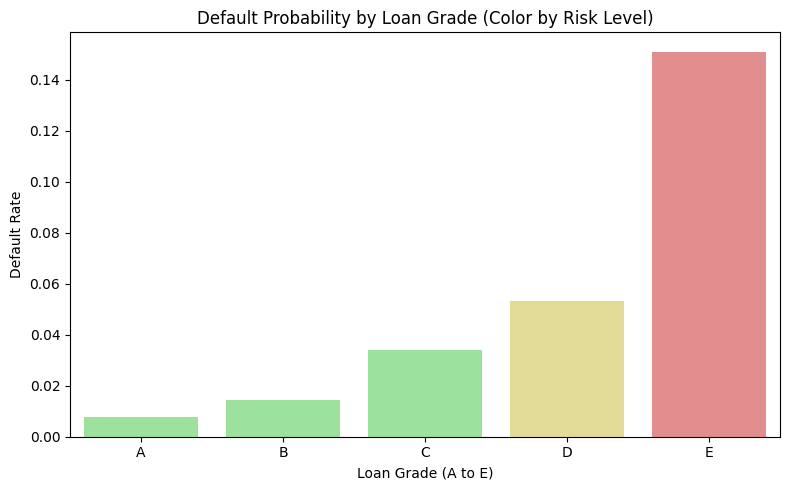

In [43]:
# Loan Grade vs Default Probability
lng_dp_tbl = (loan_with_acs.dropna(subset=['grade', 'loan_status_binary'])
              .groupby('grade', observed=True)['loan_status_binary'].mean()
              .reset_index(name='default_rate')
              .sort_values('grade'))

def color_map(rate):
    if rate > 0.06:
        return 'lightcoral'
    elif rate > 0.04:
        return 'khaki'
    else:
        return 'lightgreen'

lng_dp_tbl['color'] = lng_dp_tbl['default_rate'].apply(color_map)
palette_dict = dict(zip(lng_dp_tbl['grade'], lng_dp_tbl['color']))

plt.figure(figsize=(8,5))
sns.barplot(data=lng_dp_tbl, x='grade', y='default_rate', palette=palette_dict)
plt.title('Default Probability by Loan Grade (Color by Risk Level)')
plt.xlabel('Loan Grade (A to E)')
plt.ylabel('Default Rate')
plt.tight_layout()
plt.show()

As we are going from grade A to grade E we can see an Increase of risk which actually reflects on higher probability of default.

FICO score and Risk grades are the strongest predictors of borrower quality. We can see a **monotonic** pattern confirming that the risk scoring vs the grade system is meaningful, separating low PD from high PD customers.

The probability of default decreases with better Grade. So if the PD decreases, the Expected Loss of the lender will also decrease.

Expected Loss of Lender = PD x Loss Given Default (LGD) x Exposure at Default(EAD) or Outstanding Balance


 ### 5.2. How is the loan interest rate related to FICO score and risk grade?

Interest rate should compensate lenders for risk. Inconsistent patterns could indicate risk mispricing or inefficiencies in how Massachusetts lenders price credit risk. For U.S. banks, consistency across FICO and loan grade is crucial for profitability and fairness.

Expected outcome / hypothesis:
- Higher FICO scores tends toward lower interest rates.
- Loan grade (A–E) should align with FICO bands:
- Grade A loans: lowest interest rates.
- Grade E loans: highest interest rates.
- Interest rates will form a clear upward slope as risk worsens.


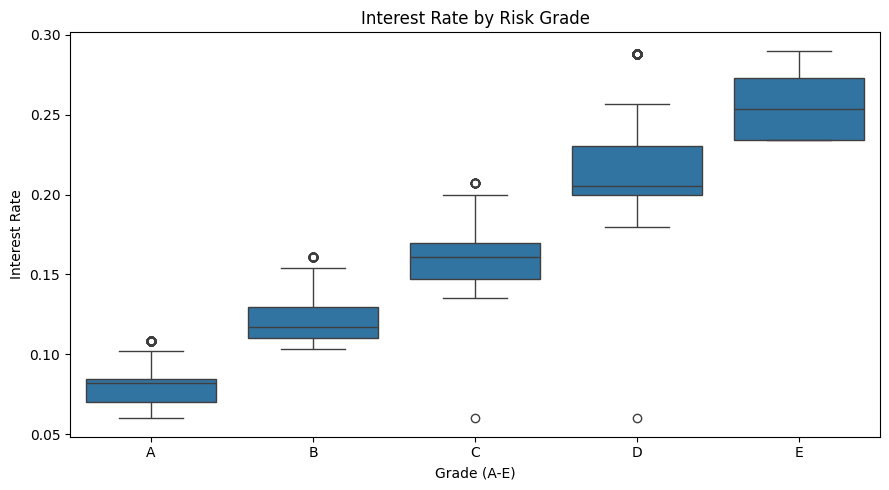

In [44]:
if "grade" in loan_with_acs.columns:
    plt.figure(figsize=(9,5))
    grade_order = sorted(loan_with_acs["grade"].dropna().astype(str).unique())
    sns.boxplot(data=loan_with_acs, x="grade", y="int_rate", order=grade_order, showfliers=True)
    plt.title("Interest Rate by Risk Grade")
    plt.xlabel("Grade (A-E)")
    plt.ylabel("Interest Rate")
    plt.tight_layout()
    plt.show()


The interest rates are inversely proportional to FICO and positively proportional to grade harshness. The rate versus FICO correlation is r ≈ −0.41, with a linear slope of approximately −0.056 percentage points per FICO point. Median grades by rate increase from A: 8.19% to B: 11.71%, C: 16.12%, D: 20.55%, and E: 25.34%, validating uniform price segregation by measured credit risk.

In this graph, we can see that the interest rate increases stepwise from A to E. The spread seen in the box plots shows the capture of borrowers' level variation, such as DTI, purpose, term, and loan amount.

This shows that for lower Grades the interest rate will be higher, which is in line with the correlation between higher PD the higher the pricing. In both of the graphs the movement from Grade A to Grade E is consistent with the higher expected PD the higher price.

These primarily validate that the PD piece via grade and shows rates should cover PD x LGD on average.



### 5.3. Is there a relationship between longer employment tenure and higher annual income?

Employment length is a proxy for stability and earning power. Banks expect that borrowers with longer work history will have higher and more predictable incomes, reducing default risk. For Massachusetts, where tech, healthcare, and education industries dominate, this relationship can show sector-driven income dynamics.

Expected outcome / hypothesis:

- Short employment (0–1 years): lower median incomes, higher variability.
- Mid-length (5–9 years): steadily higher incomes.
- Long tenure (10+ years): the highest and most stable incomes.



Q3 — Annual Income by Employment Length (median & IQR)
 emp_length    n  median_income     p25      p75
          0 3075        63000.0 40000.0  95000.0
          1 1135        70000.0 50000.0 100000.0
          2 1465        71000.0 51900.0 100000.0
          3 1277        73000.0 54000.0 100000.0
          4  909        72000.0 50000.0 100000.0
          5 1028        76184.0 55000.0 105000.0
          6  643        77000.0 55000.0 105000.0
          7  576        77500.0 54750.0 115250.0
          8  477        75000.0 55000.0 100000.0
          9  382        82200.0 55000.0 114750.0
         10 4742        85000.0 62662.0 115000.0


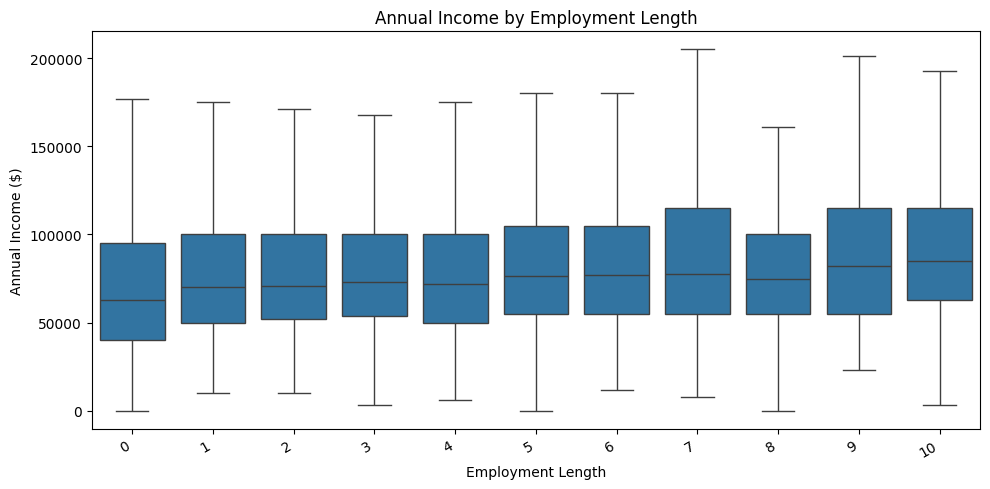

In [45]:
# Employment length vs Annual Income distribution
q3_tbl = (
    loan_with_acs.dropna(subset=["emp_length","annual_inc"])
       .groupby("emp_length")
       .agg(n=("annual_inc","size"),
            median_income=("annual_inc","median"),
            p25=("annual_inc", lambda x: np.percentile(x,25)),
            p75=("annual_inc", lambda x: np.percentile(x,75)))
       .reset_index()
)
q3_tbl[["median_income","p25","p75"]] = q3_tbl[["median_income","p25","p75"]].round(0)
print("\nQ3 — Annual Income by Employment Length (median & IQR)")
print(q3_tbl.to_string(index=False))
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_with_acs, x="emp_length", y="annual_inc", showfliers=False)
plt.title("Annual Income by Employment Length")
plt.xlabel("Employment Length")
plt.ylabel("Annual Income ($)")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


Although the median of annual income shows a small increase as employment length increases, there is no significant increase in annual income as the work tenure increases.

### 5.4. What is the correlation between the variables we plan to analyze?
The correlation matrix visualizes pairwise relationships among numeric and encoded categorical variables, including installment, loan amount, interest rate, annual income, and grade/sub-grade categories. Correlation values close to +1 or –1 indicate strong linear relationships.




Text(0.5, 1.0, 'Correlation between columns of the loans dataset')

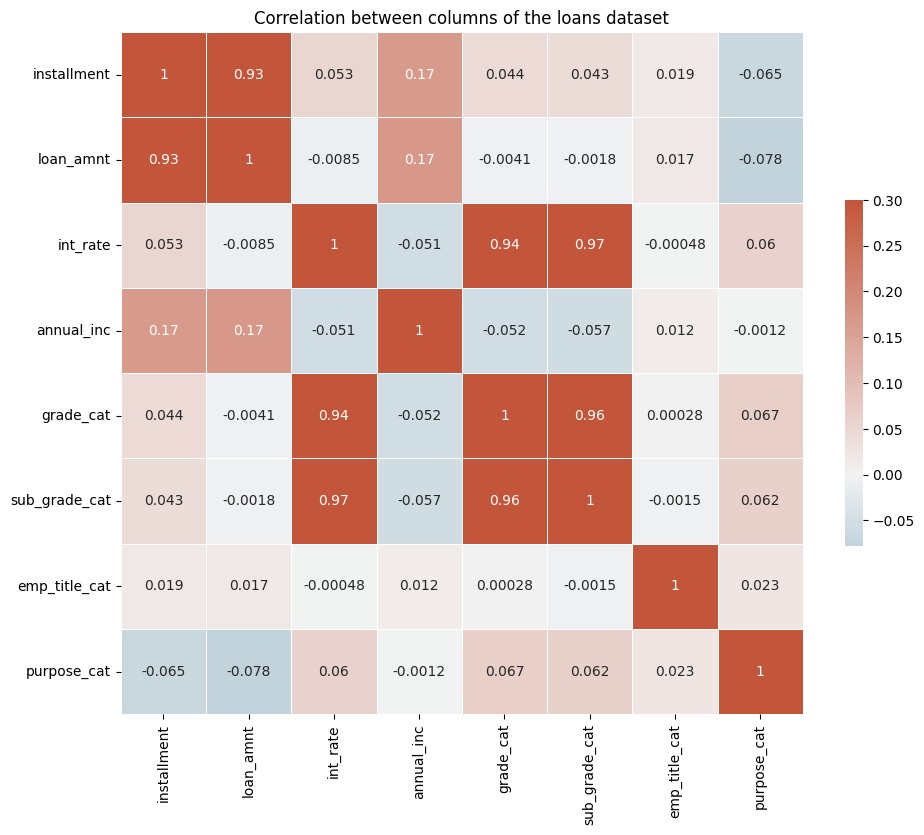

In [46]:
loan_with_acs['grade'] = loan_with_acs['grade'].astype('category')
loan_with_acs['grade_cat'] = loan_with_acs['grade'].cat.codes
loan_with_acs['sub_grade'] = loan_with_acs['sub_grade'].astype('category')
loan_with_acs['sub_grade_cat'] = loan_with_acs['sub_grade'].cat.codes
loan_with_acs['emp_title'] = loan_with_acs['emp_title'].astype('category')
loan_with_acs['emp_title_cat'] = loan_with_acs['emp_title'].cat.codes
loan_with_acs['purpose'] = loan_with_acs['purpose'].astype('category')
loan_with_acs['purpose_cat'] = loan_with_acs['purpose'].cat.codes

corr = loan_with_acs[['installment', 'loan_amnt', 'int_rate', 'annual_inc',
                      'grade_cat', 'sub_grade_cat', 'emp_title_cat', 'purpose_cat']].corr()


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) \
   .set_title("Correlation between columns of the loans dataset")


The correlations confirm expected credit relationships — loan pricing and structure are heavily tied to borrower grade and loan size, while demographic and categorical factors contribute less linearly. This analysis helped identify key variable relationships, guiding the design of subsequent visualizations and ensuring that later analyses focused on the most meaningful credit drivers.

### 5.5. How does the DTI affect the annual income?<br>


The debt-to-income ratio (DTI) is a cornerstone underwriting measure. High DTI suggests that borrowers may be financially stretched, regardless of absolute income.

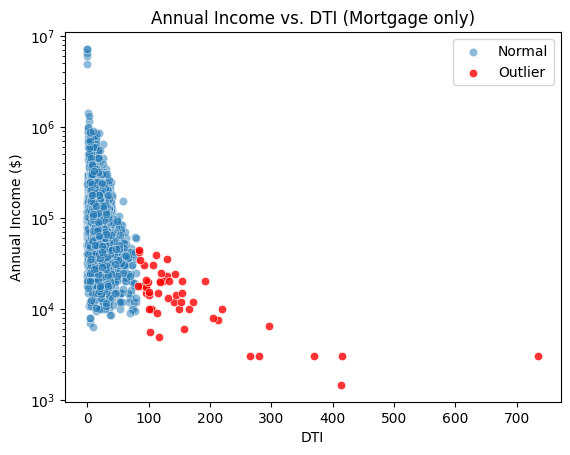

In [47]:
# Normal points (<80)
sns.scatterplot(
    data=loan_with_acs[loan_with_acs['dti'] < 80],
    x='dti', y='annual_inc',
    alpha=0.5, label='Normal'
)

# Outliers (>=80) in red
sns.scatterplot(
    data=loan_with_acs[loan_with_acs['dti'] >= 80],
    x='dti', y='annual_inc',
    alpha=0.8, color='red', label='Outlier'
)

plt.xlabel("DTI")
plt.ylabel("Annual Income ($)")
plt.yscale("log")
plt.title("Annual Income vs. DTI (Mortgage only)")
plt.legend()
plt.show()

For Massachusetts households, where costs of living are relatively high, this relationship provides insight into how income actually translates into repayment capacity. The higher the DTI the lower the annual income. We can see from the graph there are some outliers that have a higher DTI and should be flagged by the Bank (in red dots).

Inverse relation between Annual Income and DTI (Mortgage). Most borrowers have lower DTI ratios with higher incomes. Found outliers greater than Debt-to-income ratio of 80.

### 5.6. How does default probability vary with loan risk grade based on the purpose of the loan across the US?

Loan purpose helps identify behavioral risk differences across borrowers. Each loan category—such as debt consolidation, home improvement, or small business—carries its own economic sensitivity and repayment pattern. By examining default probability against loan grade, we see how credit quality interacts with purpose-specific risk.

/tmp/ipython-input-531756234.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(plot_df['grade']):


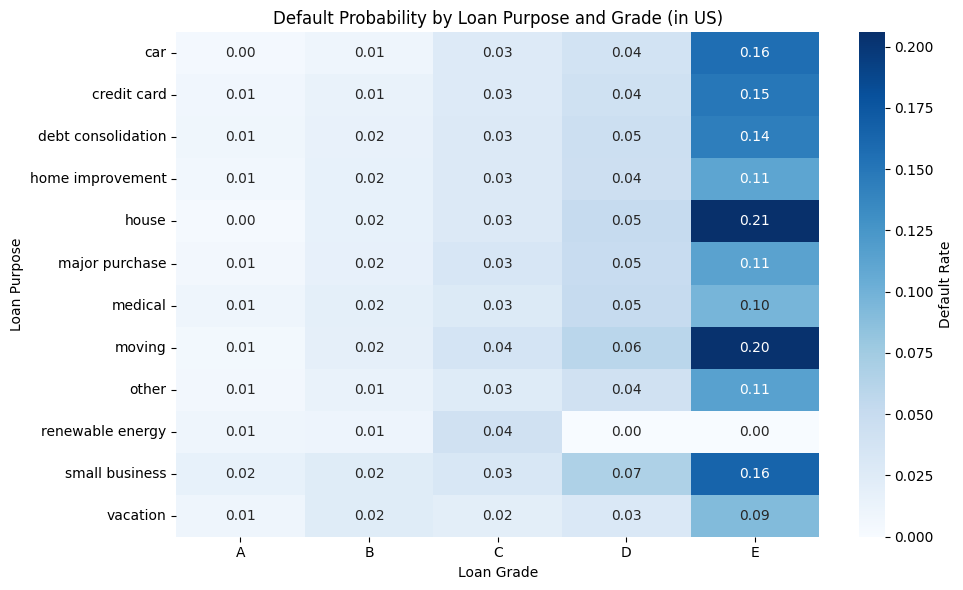

In [48]:
# Loan Pupose vs Default Probability
clean_loan['loan_status_binary'] = pd.to_numeric(clean_loan['loan_status_binary'], errors='coerce')

plot_df = clean_loan.dropna(subset=["purpose","grade","loan_status_binary"]).copy()

if pd.api.types.is_categorical_dtype(plot_df['grade']):
    grade_order = [g for g in ['A','B','C','D','E','F','G'] if g in plot_df['grade'].cat.categories]
else:
    grade_order = sorted(plot_df['grade'].dropna().unique().tolist(), key=lambda x: ['A','B','C','D','E','F','G'].index(x) if x in list('ABCDEFG') else 999)

pivot = (plot_df
         .groupby(["purpose","grade"], observed=True)["loan_status_binary"]
         .mean()
         .reset_index()
         .pivot(index="purpose", columns="grade", values="loan_status_binary")
        )
# Reindex columns to desired order (only those present)
pivot = pivot.reindex(columns=grade_order)

# --- Critical: convert pd.NA -> np.nan and to float dtype
pivot = pivot.replace({pd.NA: np.nan}).apply(pd.to_numeric, errors='coerce').astype(float)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="Blues", cbar_kws={"label":"Default Rate"})
plt.title("Default Probability by Loan Purpose and Grade (in US)")
plt.xlabel("Loan Grade")
plt.ylabel("Loan Purpose")
plt.tight_layout()
plt.show()

Across the United States, default probability rises consistently with lower loan grades (A → E) for nearly every purpose. Borrowers with weaker credit grades exhibit higher default rates, particularly in house loans (0.21) and moving loans (0.20). These categories tend to depend on external economic factors—like property values or business cash flow—that amplify repayment risk.

### 5.7. Exploring the relationship between FICO score and the tenure of individual's employment across the US

Employment length is a proxy for income stability and tenure. If longer tenure signals steadier earnings, we’d expect slightly stronger credit profiles (higher FICO). The chart plots the average high/low ends of each borrower’s reported FICO range by years employed.

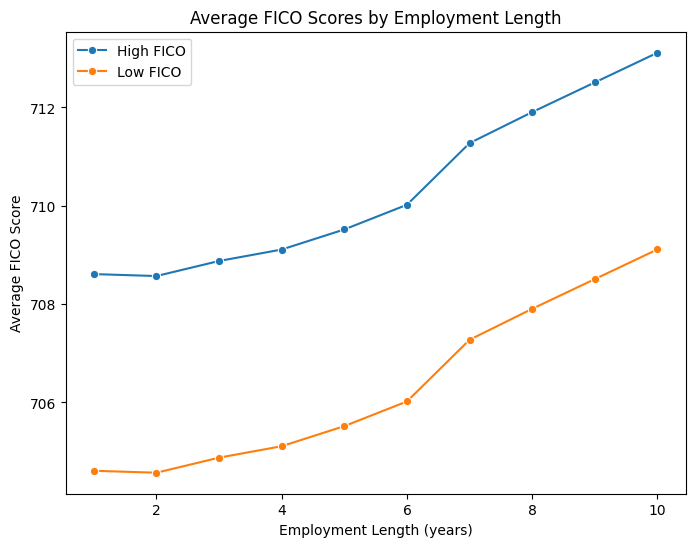

In [49]:
# Aggregate average FICO by employment length
emp_group = clean_loan.groupby('emp_length')[['fico_range_high','fico_range_low']].mean().reset_index()
emp_group = emp_group[emp_group['emp_length'] != 0]

plt.figure(figsize=(8,6))
sns.lineplot(data=emp_group, x='emp_length', y='fico_range_high', marker='o', label='High FICO')
sns.lineplot(data=emp_group, x='emp_length', y='fico_range_low', marker='o', label='Low FICO')
plt.xlabel('Employment Length (years)')
plt.ylabel('Average FICO Score')
plt.title('Average FICO Scores by Employment Length')
plt.show()

Average FICO scores trend upward with employment length. From ~1–2 years to 10 years, the average High FICO rises roughly 708 → 713+, and the Low FICO rises ~704.5 → ~709+. The improvement is gradual but monotonic.

### 5.8. Do higher income groups within the US population tend to have higher average FICO scores?
Higher income is generally associated with greater financial stability and lower credit risk, which should correspond to higher FICO scores.

This visualization combines two dimensions:

- Bars (left axis): show the population distribution by income group.
- Lines (right axis): plot the average High FICO and Low FICO scores for each income bracket.

/tmp/ipython-input-2509038732.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_sum = clean_loan.groupby('Income Group')[['fico_range_high','fico_range_low']].mean().reset_index()


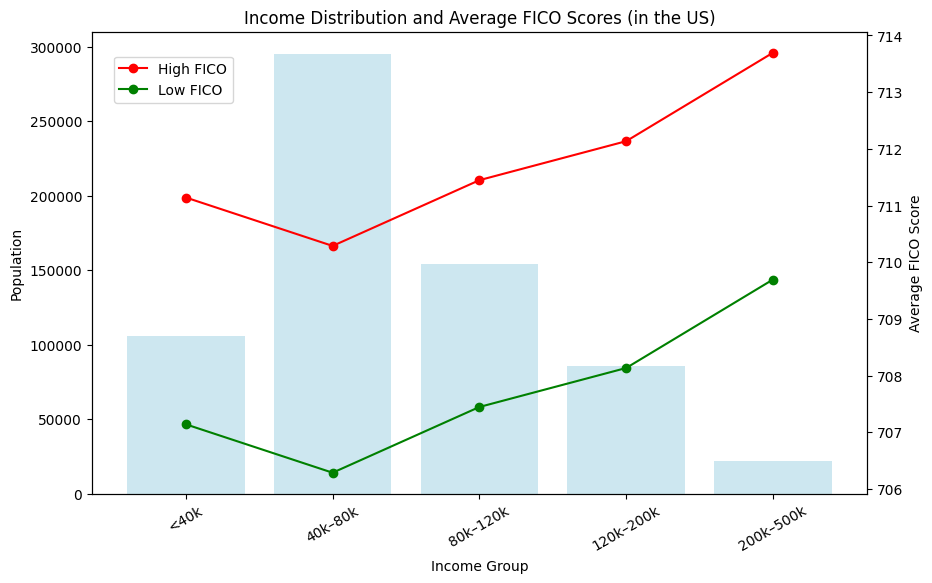

In [50]:
# Put annual income into different categories and count the population of each income group
bins = [0, 40000, 80000, 120000, 200000, 500000]
labels = ['<40k', '40k–80k', '80k–120k', '120k–200k', '200k–500k']
clean_loan['Income Group'] = pd.cut(clean_loan['annual_inc'], bins=bins, labels=labels, include_lowest=True)
income_counts = clean_loan['Income Group'].value_counts().sort_index()

# Aggregate FICO High and Low by Income Group
income_sum = clean_loan.groupby('Income Group')[['fico_range_high','fico_range_low']].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart
ax1.bar(income_counts.index, income_counts.values, color='lightblue', alpha=0.6)
ax1.set_xlabel('Income Group')
ax1.set_ylabel('Population')
plt.xticks(rotation=30)

# Line chart
ax2 = ax1.twinx()
ax2.plot(income_sum['Income Group'], income_sum['fico_range_high'], marker='o', color='red', label='High FICO')
ax2.plot(income_sum['Income Group'], income_sum['fico_range_low'], marker='o', color='green', label='Low FICO')
ax2.set_ylabel('Average FICO Score')

# Add legends
fig.legend(loc='upper left',bbox_to_anchor=(0.14, 0.85))
plt.title('Income Distribution and Average FICO Scores (in the US)')
plt.show()

Higher income groups tend to have higher average FICO scores, with FICO score trends increasing as income rises.

The second extract of the information is that the 40k-80k income range is the modal for consumer book, which is the broad mass of prime applicants for loans.

As income rises, the pool thins, which means that there are fewer customers earning 120k-200k, and very high earners 200k-500 are rare and often self-financed, which means they will need less for loan products.

For customers below the 40k income, the graph shows they are filtered. Although there are many people earning 40k, fewer of them make it into the funded loan population, with smaller, shorter loan approvals.


### 5.9. Do  areas in Massachusetts with more stable earner population exhibit lower default rates?

To explore whether regions with a larger share of residents aged 25–44 years (prime working-age population) exhibit lower loan default rates. This age group typically represents stable earners, which could theoretically contribute to stronger credit performance.

/tmp/ipython-input-242182726.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_default = (df.groupby('age_bin')['loan_status_binary'].mean().reset_index().rename(columns={'loan_status_binary': 'default_rate'}))


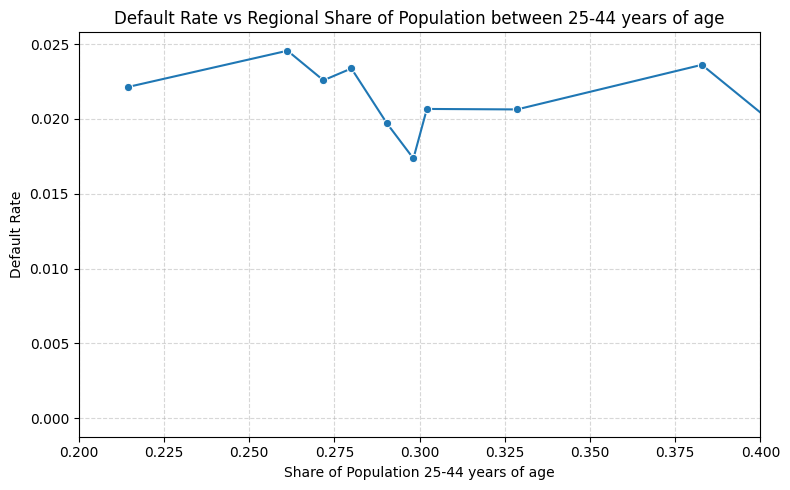

In [51]:
df = loan_with_acs.copy()

# quantile bins
df['age_bin'] = pd.qcut(df['age_share_25-44'], q=10, duplicates='drop')

# compute average default rate per bin
age_default = (df.groupby('age_bin')['loan_status_binary'].mean().reset_index().rename(columns={'loan_status_binary': 'default_rate'}))

# extract midpoints for plotting
age_default['bin_mid'] = age_default['age_bin'].apply(lambda r: r.mid if hasattr(r, 'mid') else None)

plt.figure(figsize=(8,5))
sns.lineplot(data=age_default, x='bin_mid', y='default_rate', marker='o')
plt.title('Default Rate vs Regional Share of Population between 25-44 years of age')
plt.xlabel('Share of Population 25-44 years of age')
plt.ylabel('Default Rate')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0.2, 0.4)
plt.tight_layout()
plt.show()

The relationship shown in the chart is weak and non-linear, which tells us the area age mix has limited but non-zero explanatory power versus borrower-level variables.

•	Default rates fluctuate between ~1.7% and 2.5%, a ~0.8 pp swing in PD across the demographic range is small relative to borrower-lever drivers such as FICO/Grade, DTI, purpose, and term.

•	The age composition alone does not significantly explain variation in default behavior across regions; it is a secondary predictor, showing a lower PD around a sweet spot of job dynamism, in this case, when the demographic range is around 30% of the population.

The hypothesis that a higher share of 25–44-year-olds correlates with lower default risk is not supported. While this demographic is typically viewed as financially stable, local economic conditions and loan characteristics appear to play a stronger role in determining repayment performance.

### 5.10. Does the loan risk grade affect the median loan amount borrowed?

Loan grade reflects the lender’s assessment of a borrower’s credit risk — where grade A indicates the strongest credit profile and E represents higher risk. The median loan amount shows how loan size differs across credit categories and reveals how lenders allocate credit based on perceived default risk and possible earnings.

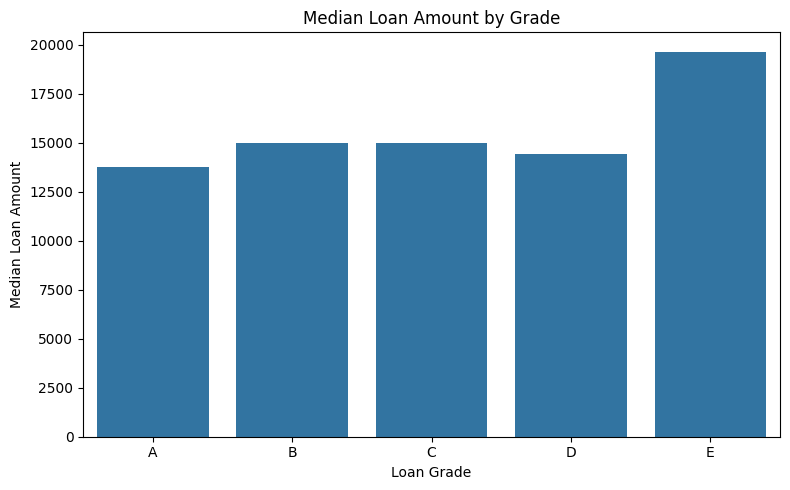

In [52]:
# Median Loan Amount Distribution by Loan Grade

plot_df = loan_with_acs.dropna(subset=['grade','loan_amnt']).copy()

amt_tbl = (plot_df
           .groupby('grade', observed=True)['loan_amnt']
           .median()
           .reset_index(name='median_loan')
           .sort_values('grade'))

plt.figure(figsize=(8,5))
sns.barplot(data=amt_tbl, x='grade', y='median_loan')
plt.title('Median Loan Amount by Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Median Loan Amount')
plt.tight_layout()
plt.show()

The chart shows a rising trend in median loan amount from Grade A to Grade E, with Grade E borrowers having the highest median loan amount (around $19,500). This suggests that riskier borrowers tend to request or receive larger loans, possibly due to higher financial need or refinancing behavior. In contrast, prime borrowers (Grades A–B) maintain smaller median loan amounts, consistent with conservative borrowing patterns and tighter lender controls on low-risk credit lines.

### 5.11. What is the relationship between FICO score and default rate with respect to progressive credit quality score?
FICO bands represent ranges of borrower credit scores — higher scores indicate stronger creditworthiness. Loan term (in months) reflects the repayment duration: 36-month (short-term) vs 60-month (long-term) loans. Typically, borrowers with lower FICO scores or longer terms are more likely to default, as they either have weaker credit histories or face greater exposure to economic changes over time.

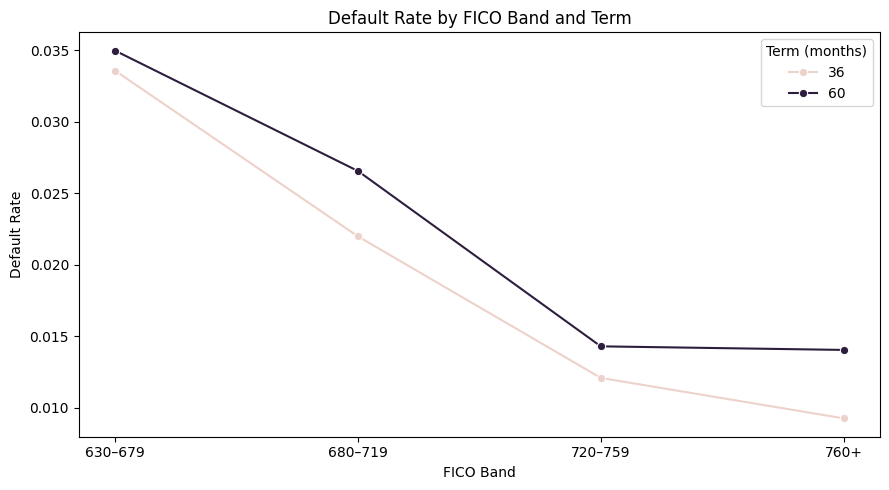

In [53]:
# Build a single FICO score from the range (midpoint)
loan_with_acs = loan_with_acs.copy()
loan_with_acs['fico_score'] = ((loan_with_acs['fico_range_low'] + loan_with_acs['fico_range_high']) / 2).round()

# Define FICO bands and labels
bins = [300, 579, 629, 679, 719, 759, 850]
labels = ['<580', '580–629', '630–679', '680–719', '720–759', '760+']

loan_with_acs['fico_band'] = pd.cut(loan_with_acs['fico_score'],bins=bins,labels=labels,include_lowest=True,right=True)

# Plot
plot_df = loan_with_acs.dropna(subset=['fico_band','loan_status_binary','term'])

agg = (plot_df.groupby(['fico_band','term'], observed=True)['loan_status_binary'].mean().reset_index(name='default_rate').sort_values(['fico_band','term']))

plt.figure(figsize=(9,5))
sns.lineplot(data=agg, x='fico_band', y='default_rate', hue='term', marker='o')
plt.title('Default Rate by FICO Band and Term')
plt.xlabel('FICO Band')
plt.ylabel('Default Rate')
plt.legend(title='Term (months)')
plt.tight_layout()
plt.show()


The chart shows a clear negative relationship between FICO score and default rate — as credit quality improves from 630–679 to 760+, default rates decline sharply for both term types. Additionally, 60-month loans consistently exhibit higher default rates than 36-month loans within every FICO band.

This indicates that longer loan terms increase credit risk, likely due to extended exposure to income shocks and financial uncertainty.

### 5.12. Comparing the debt-to-income distribution of non defaulters and defaulters
The Debt-to-Income (DTI) ratio measures how much of a borrower’s monthly income goes toward debt payments — a key indicator of financial strain and repayment capacity. High DTI values imply heavier debt burdens relative to income, increasing the risk of default.

/tmp/ipython-input-1390628515.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non Defaulters','Defaulters'])


(0.0, 60.0)

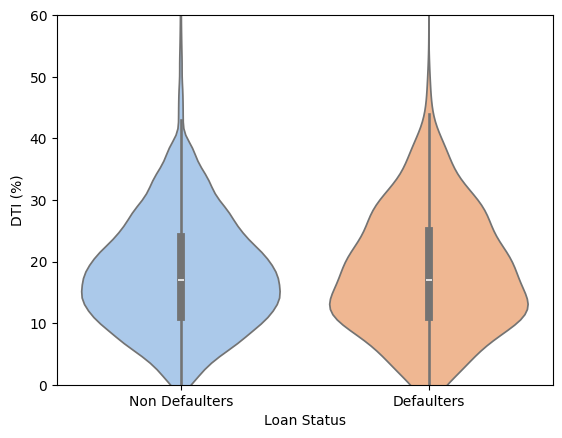

In [54]:
ax = sns.violinplot(x = loan_with_acs['loan_status_binary'] ,y =  loan_with_acs[loan_with_acs["dti"]<100]["dti"].astype('int'), hue = 'loan_status_binary',palette='pastel',legend=False, data = loan_with_acs)
ax.set_xticklabels(['Non Defaulters','Defaulters'])
ax.set_ylabel("DTI (%)")
ax.set_xlabel("Loan Status")
ax.set_ylim(0,60)

Although we see a longer tail is visible on the Defaulters compared to Non Defaulters, the DTI distributions for Defaulters and Non-Defaulters are broadly similar, both centered around 15–20%. This suggests that DTI alone is not a strong differentiator of default behavior within this dataset.

### 5.13. Comparing loan grade distribution across US against Massachusetts

Loan grade represents the lender’s assessment of borrower credit quality — Grade A being the most creditworthy and E the riskiest. Comparing regional versus national grade distributions helps identify whether local borrowers differ in overall credit profile and risk exposure.

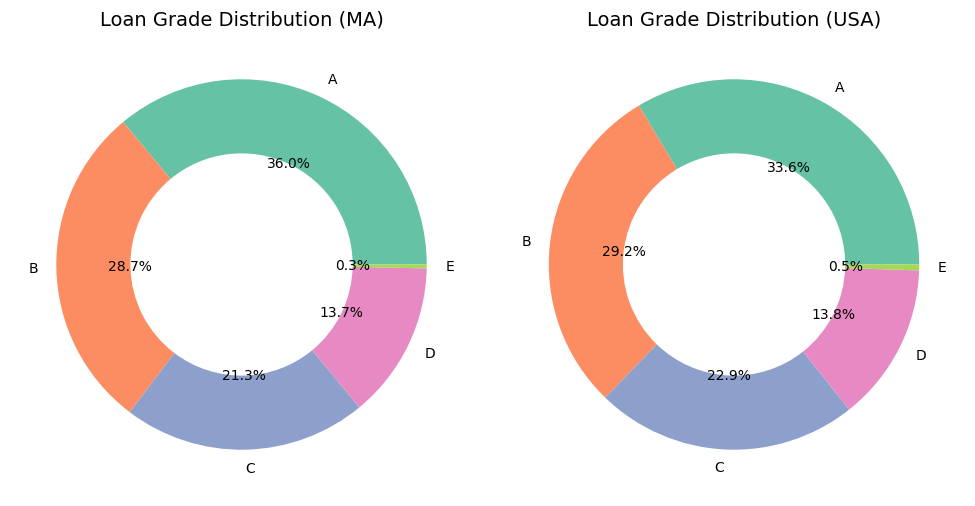

In [55]:
# MA
grade_c_ma = loan_with_acs['grade'].value_counts()
percentages_ma = grade_c_ma / grade_c_ma.sum() * 100
df_percent_ma = pd.DataFrame({'grade': percentages_ma.index, 'percentage': percentages_ma.values})
# USA
grade_c_us = clean_loan['grade'].value_counts()
percentages_us = grade_c_us / grade_c_us.sum() * 100
df_percent_us = pd.DataFrame({'grade': percentages_us.index, 'percentage': percentages_us.values})

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Left: Massachusetts
axes[0].pie(
    df_percent_ma['percentage'],
    labels=df_percent_ma['grade'],
    wedgeprops={'width': 0.4},
    colors=plt.cm.Set2.colors,
    autopct='%1.1f%%'
)
axes[0].set_title('Loan Grade Distribution (MA)', fontsize=14)

# Right: USA
axes[1].pie(
    df_percent_us['percentage'],
    labels=df_percent_us['grade'],
    wedgeprops={'width': 0.4},
    colors=plt.cm.Set2.colors,
    autopct='%1.1f%%'
)
axes[1].set_title('Loan Grade Distribution (USA)', fontsize=14)

plt.tight_layout()
plt.show()

Massachusetts (MA) shows a slightly stronger credit profile compared to the national average.

* MA: 36% of loans are Grade A, versus 33.6% nationally.
* Grades B and C account for ~50% combined in both regions, though MA’s share of C-grade loans (21.3%) is marginally lower than the national (22.9%).
* Grades D and E remain small in both samples (<14% and <1%, respectively).

Overall, the Massachusetts portfolio skews modestly toward higher-grade (lower-risk) loans, suggesting better borrower quality relative to the U.S. average.

### 5.14. How does the total revolving balance affect the loan status with progressive grade quality?



Mostly the revolving balances are in the higher grades and compared to non-defaulted balances, defaulted balances are only in a small proportion.

/tmp/ipython-input-3939493964.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = (loan_with_acs.groupby(["grade", "loan_status_binary"])["revol_bal"].sum().reset_index().pivot(index="grade", columns="loan_status_binary", values="revol_bal").fillna(0))


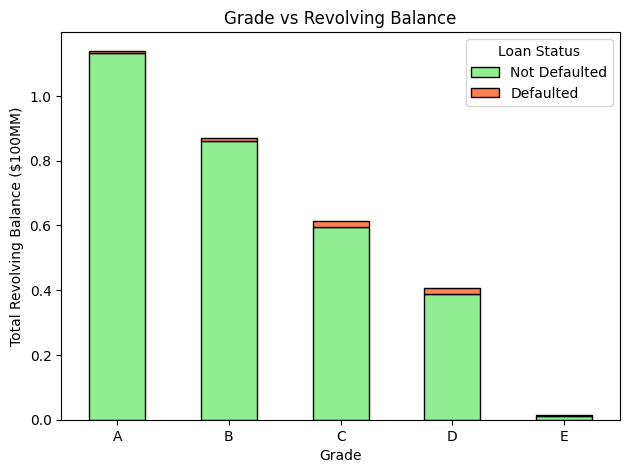

In [56]:
# group + pivot
plot_data = (loan_with_acs.groupby(["grade", "loan_status_binary"])["revol_bal"].sum().reset_index().pivot(index="grade", columns="loan_status_binary", values="revol_bal").fillna(0))

# rename columns for clarity
plot_data = plot_data.rename(columns={0: "Not Defaulted", 1: "Defaulted"})

plot_data = plot_data / 1e8

# plot stacked bar
plot_data.plot(kind="bar",stacked=True,color={"Not Defaulted": "lightgreen", "Defaulted": "coral"},edgecolor="black")

plt.title("Grade vs Revolving Balance")
plt.xlabel("Grade")
plt.ylabel("Total Revolving Balance ($100MM)")
plt.legend(title="Loan Status", loc="upper right")
plt.tight_layout()
plt.xticks(rotation = 0)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


We can see how larger total revolving balances concentrate in better grades A, B, and C simply because those grades dominate volume.

The default segment or stack portion grows as grades worsen, even if the total bar height shrinks in the tail.

Higher revolving balances imply higher minimum payments relative to income, raising DTI and effective utilization.

The high difference between Grade D and E is because the costs of loans for grade E are very high, plus funding of operating expenses are not often acceptable or permitted, so very few loans marketed as E are delivered.


### 5.15 Which areas of Massachusetts shows higher risk of defaulting when compared against its median income?

The left map shows average median household income by ZIP3 region, while the right map displays loan delinquency rates (percentage of loans past due). Comparing these maps reveals how local income levels correspond to repayment performance within the state.

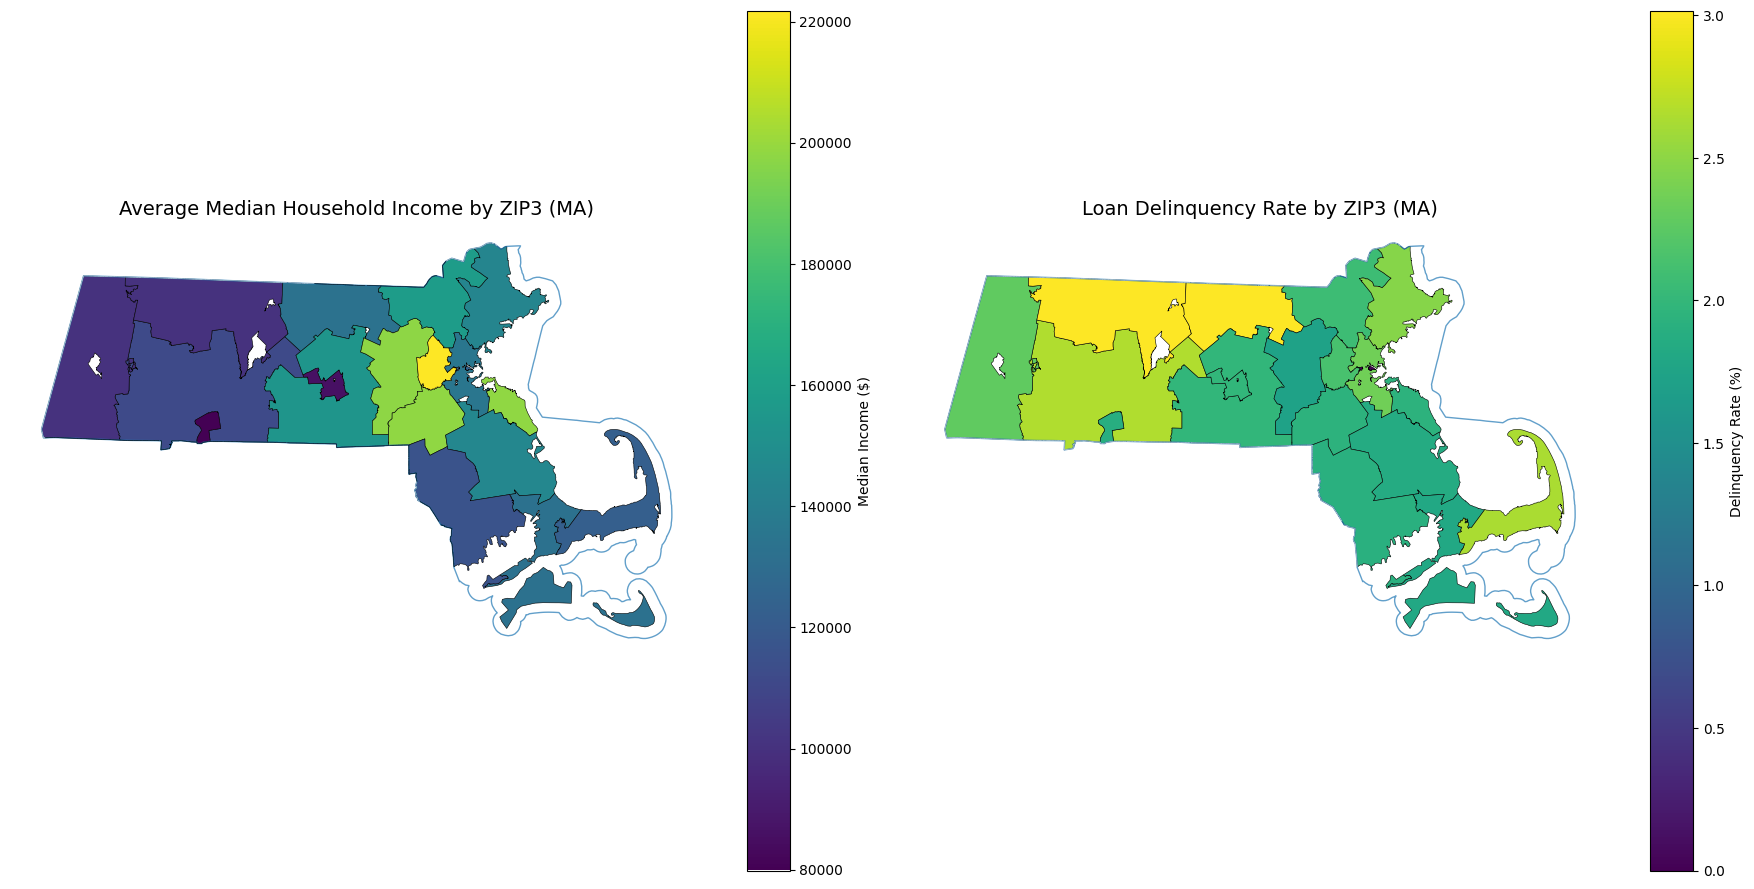

In [57]:
# Load TIGER geographies
zcta = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2020/ZCTA5/tl_2020_us_zcta510.zip")
states = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2020/STATE/tl_2020_us_state.zip")

ma = states[states["STATEFP"] == "25"].to_crs(zcta.crs)
zcta_ma = gpd.clip(zcta, ma).rename(columns={"ZCTA5CE10": "ZCTA5"})
zcta_ma["zip3"] = zcta_ma["ZCTA5"].str[:3]

# dissolve to ZIP3 polygons (1 row per zip3)
zcta_ma_zip3 = zcta_ma[["zip3", "geometry"]].dissolve(by="zip3", as_index=False)
zcta_ma_zip3 = zcta_ma_zip3.set_crs(zcta_ma.crs)

# Income
inc_zip3 = (loan_with_acs.groupby("zip3", as_index=False)["median_income_wa"].mean().rename(columns={"median_income_wa": "mean_income_zip3"}))

# Delinquency (loan_status_binary: 1 = default)
delinq_zip3 = (
    loan_with_acs.groupby("zip3", as_index=False)
    .agg(
        delinquency_rate=("loan_status_binary", "mean"),
        n_loans=("loan_status_binary", "size"),
        n_defaults=("loan_status_binary", "sum"),
    )
)
delinq_zip3["delinquency_rate_pct"] = delinq_zip3["delinquency_rate"] * 100

# Merge geographies
gdf_income = zcta_ma_zip3.merge(inc_zip3, on="zip3", how="left", validate="1:1")
gdf_delinq = zcta_ma_zip3.merge(delinq_zip3, on="zip3", how="left", validate="1:1")

MIN_N = 30
gdf_delinq["rate_plot"] = np.where(gdf_delinq["n_loans"].fillna(0) >= MIN_N,gdf_delinq["delinquency_rate_pct"],np.nan)

# Plot both
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

# Left: Income map
ma.boundary.plot(ax=axes[0], linewidth=1, alpha=0.7)
gdf_income.plot(column="mean_income_zip3",ax=axes[0],cmap="viridis",linewidth=0.4,edgecolor="black",legend=True,legend_kwds={"label": "Median Income ($)", "fmt": "%.0f"},missing_kwds={"color": "#f0f0f0", "edgecolor": "none", "label": "No data"},)
axes[0].set_title("Average Median Household Income by ZIP3 (MA)", fontsize=14)
axes[0].set_axis_off()


# or use "delinquency_rate_pct" if you don't want the MIN_N filter
# Right: Delinquency map
ma.boundary.plot(ax=axes[1], linewidth=1, alpha=0.7)
gdf_delinq.plot(column="rate_plot",ax=axes[1],cmap="viridis",linewidth=0.4,edgecolor="black",legend=True,legend_kwds={"label": "Delinquency Rate (%)", "fmt": "%.1f%%"},missing_kwds={"color": "#f0f0f0", "edgecolor": "none", "label": "No data"},)
axes[1].set_title("Loan Delinquency Rate by ZIP3 (MA)", fontsize=14)
axes[1].set_axis_off()

plt.tight_layout()
plt.show()


A clear inverse relationship emerges between income and delinquency rates across Massachusetts.

High-income areas (yellow-green on the left map — e.g., Greater Boston, MetroWest) tend to exhibit lower delinquency rates (darker green on the right map).

Lower-income western and southeastern ZIPs (purple-blue on the income map) show higher delinquency levels, with some regions exceeding 2.5–3%.

This geographic pattern reinforces that income stability directly influences loan performance. Regions with stronger household earnings are less likely to experience repayment issues, whereas lower-income regions show elevated credit stress.

---


# 6. Conclusions

The project establishes, with Massachusetts-specific evidence, that credit quality remains the spine of default risk: better grades and higher FICO scores reliably translate into lower realized PD, and the maturity premium is real; longer terms carry meaningfully higher default incidence even within the same credit tier. This rank ordering validates the use of grade and FICO as primary underwriting signals, and it quantifies the incremental cost of time, which should be reflected in term premium and term availability at the lower end of the risk spectrum.

Pricing is broadly aligned with risk: interest rates fall as quality improves and step up across grade bands, indicating that the market’s risk-based pricing machinery is functioning as intended. Where we do observe dispersion, borrowers with similar grades paying materially different rates, the residual differences map to capacity and behavior variables (DTI, purpose, revolving utilization) rather than to noise, suggesting targeted opportunities to tighten pricing adequacy at the margin. By contrast, employment length adds little incremental signal once capacity and quality are controlled, reinforcing that tenure is a poor proxy for ability to repay in this market.

The integration of borrower-level data with local socioeconomic context adds genuine calibration value. Lower-income ZIP3s in Massachusetts show persistently higher delinquency after controlling for core borrower attributes, while higher-income areas perform better, and age-structure indicators exhibit non-linear relationships consistent with labor-market and cost-of-living trade-offs. These place-based variables do not replace borrower signals, but they help explain residual risk, reduce geographic miscalibration, and sharpen early-warning visibility, particularly in pockets where national priors underperform. Used as overlays rather than hard cutoffs, they improve fairness and transparency by aligning price with expected loss without excluding borrowers by geography.

In summary, loan risk depends on both who we lend to and where they live. A borrower’s credit quality (grade/FICO) gives us the starting point for risk. Their ability to afford payments (DTI and how much revolving debt they already carry) moves that risk up or down. The reason for the loan and how long it lasts (purpose and term) make smaller adjustments. Finally, local conditions (like neighborhood income or age mix) help us fine-tune what’s left. When we line up price with this layered view, the interest rate better matches the real chance of loss, earnings are steadier across different groups, and we can use simple, targeted tweaks, like slightly higher rates for longer terms, sensible DTI limits, small add-ons for riskier purposes, or caution with heavy credit-card users, without resorting to broad, heavy-handed tightening.

This analysis underscores the necessity of rigorous model governance in credit risk assessment. Observed relationships, particularly those tied to demographic variables, often have limited amplitude and are highly sensitive to sample composition. As a result, regular model back-testing and the use of confidence intervals are essential for robust monitoring. Out-of-time validation further guards against illusory stability. Despite modest effects in certain variables, consistent patterns in Massachusetts and alignment with credit theory affirm the conclusions. The approach should be to align pricing and credit allocation with areas where data substantiates risk. Local context serves to refine model calibration, enhancing accuracy and fairness, but should not restrict credit access. This practice maintains responsible, resilient lending and supports equitable credit allocation.

---


# 7. Challenges & Future steps

## Challenges
* Data Cleaning:
The loan dataset contained inconsistent formats for variables like employment length, interest rate, and revolving utilization, often stored as strings. We standardized these to numeric formats, filled missing values, and encoded categories, enabling reliable aggregation and analysis.

* Dataset Merging:
Combining LendingClub and ACS data was difficult because loans used partial ZIP codes (ZIP3) while ACS relied on full ZCTA5 areas. We derived ZIP3 from ZCTA5 and aggregated income and demographic metrics at that level, ensuring a clean, one-to-many join between borrowers and local conditions.

* Missing and Noisy Data:
Key variables such as employment title, DTI, and revol_util had missing or inconsistent entries. We imputed missing values and validated with visual missingness checks to preserve completeness without introducing bias.

* Performance and Scale:
Merging large datasets (~385 MB) strained Colab memory. We optimized by limiting columns, reading data in chunks, and using merge validations—streamlining execution and preventing crashes.

## Future Steps
Building on this foundation, the next stage of work will focus on both predictive modeling and practical deployment:

* Model Enhancement: Train interpretable logistic or tree-based models combining borrower and ACS features to quantify geographic uplift on default prediction.

* Dataset Supplement: Expanding the dataset to post Covid years along with datasets from other financial institutions to help better understand the contribution of socioeconomic trends on risk defaulting.

* Fair Pricing Framework: Translate model outputs into rate-setting rules—charging modest increments for higher risk while maintaining access for marginal borrowers.

* Regional Stress Testing: Simulate shocks to local income or employment to identify ZIP3s most sensitive to economic downturns.

* Portfolio Monitoring Dashboard: Build an automated visualization of income vs. delinquency trends by region to guide concentration risk management.

---

# 8. References



- https://geopandas.org/en/stable/docs/user_guide.html

- https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html

- https://python-graph-gallery.com/

- https://www.geeksforgeeks.org/pandas/

- https://stackoverflow.com/questions/

- https://medium.com/@amit25173/extracting-substrings-from-pandas-columns-0a9cf37919ef

- https://www.w3schools.com/python/pandas


- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

- https://www.sciencedirect.com/science/article/pii/S2666764923000218

- https://seaborn.pydata.org/examples/index.html

- https://www.investopedia.com/terms/
---

# 9. Gen AI Disclosure


During the completion of this project, Generative AI tools were employed to support specific components of our work:

- Code Review and Debugging: ChatGPT was utilized to review and optimize our code, suggest improvements, and assist in resolving technical issues.

- Research Assistance: ChatGPT was used to identify relevant programming libraries and to aid in understanding complex technical concepts.

- Proofreading and Grammar Checks: AI was employed to enhance the clarity, coherence, and grammatical accuracy of the written material.

All AI-assisted outputs were thoroughly reviewed, edited, and validated by the  team to ensure their accuracy, relevance, and compliance with academic integrity standards.


#
---